In [8]:
import geopandas as gpd
import numpy as np
import pygmt

# Map extent & projection

In [9]:
# Set Regional Map dimensions
west, east, south, north = -133.0, -108.0, 35.0, 50.0 #wesn
region_data = np.array([west, east, south, north])

In [10]:
# Get center position and two latitude locations to define regional projection
clon, clat = np.mean([west, east]), np.mean([south, north])
lat1 = np.floor(0.5 * (north - clat) + clat)
lat2 = np.floor(clat - 0.5 * (clat - south))

In [11]:
mapwidth = 10.0 # inches

# proj1 = f'B{clon}/{clat}/{lat1}/{lat2}/{mapwidth}i'

proj1 = f'M{clon}/{clat}/{mapwidth}i'

print(proj1)

M-120.5/42.5/10.0i


## Create figure

In [12]:
# Start figure
fig = pygmt.Figure()
fig.basemap(region=region_data, projection=proj1, frame=["a5f1", f"WSne"])

# download the relief data from pygmt
fig.grdimage(grid="@earth_relief_01m", cmap="geo")

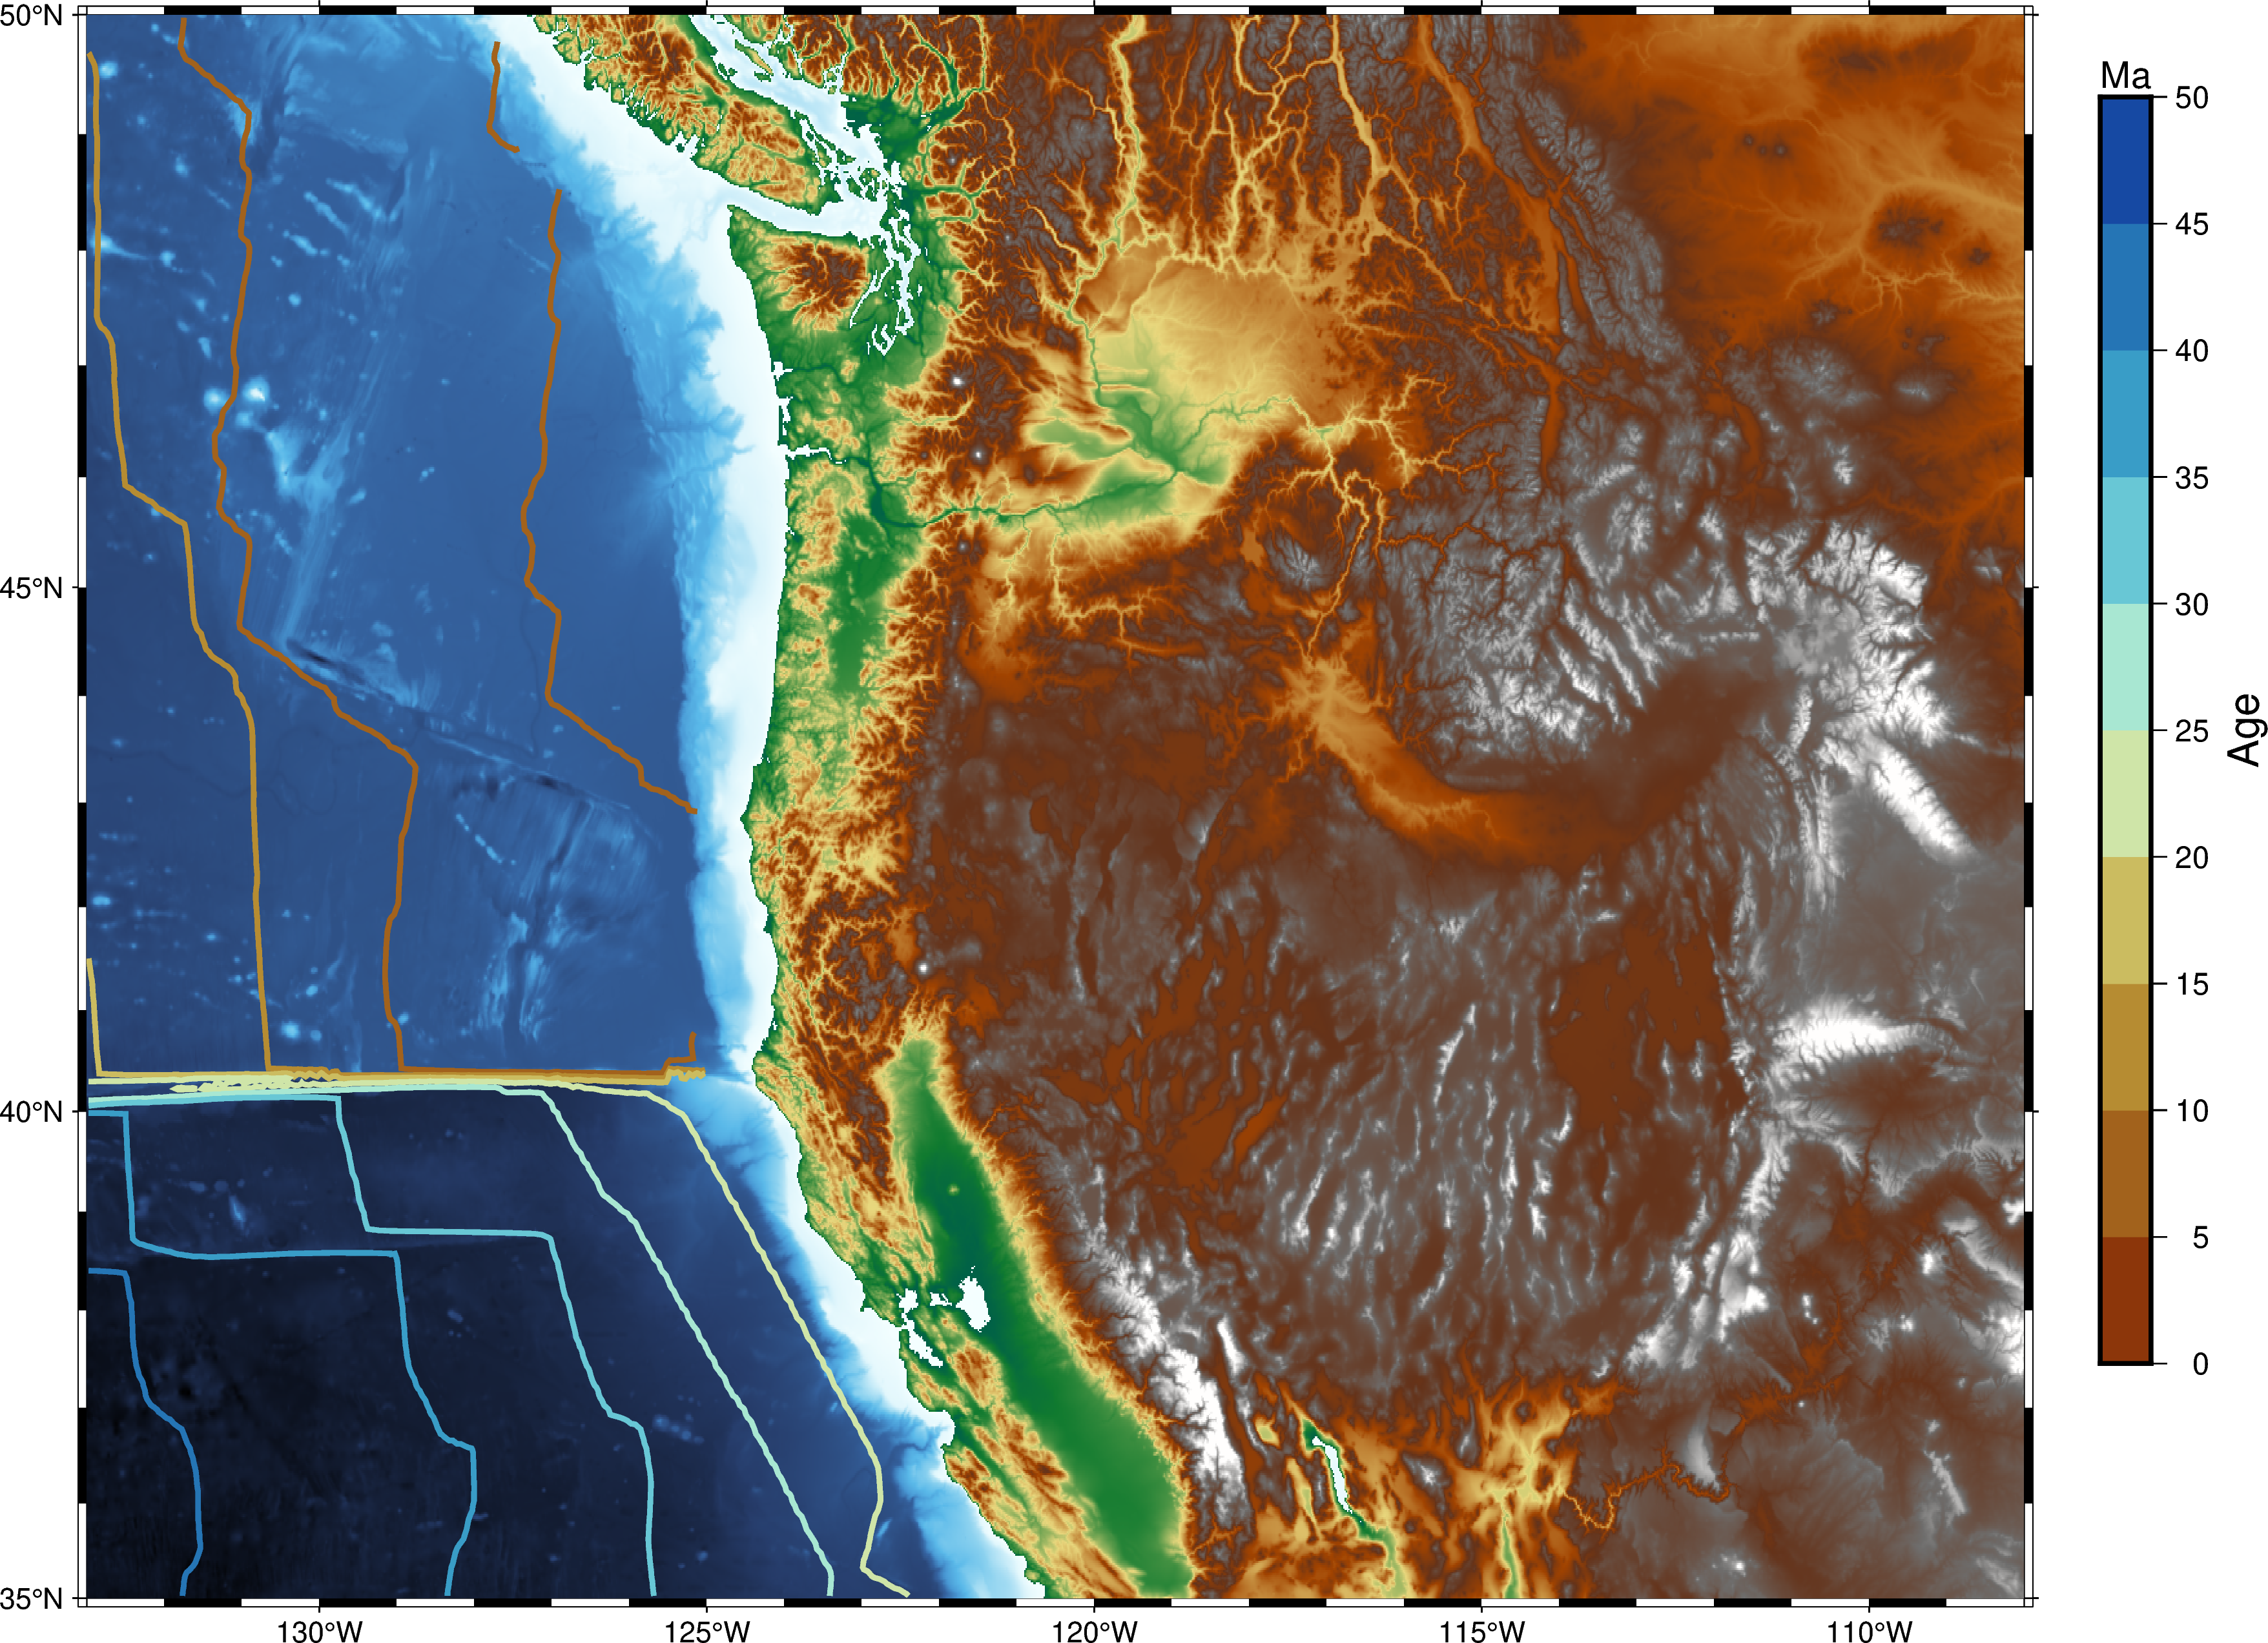

In [13]:
# plot plate isochrons
cptfile = "age.cpt"
pygmt.makecpt(cmap="roma", series=[0, 50, 5], output=cptfile)

# plot the isochrons with different colors based on the cpt file
fig.grdcontour(
    grid="@earth_age_03m",
    annotation="n",
    levels=cptfile,
    pen="2p+c",
)

# add colorbar for the isochrons
fig.colorbar(
    cmap=cptfile,
    position="JMR+o1c",
    box=False,
    frame=["a5", "x+lAge", "y+lMa"],
)

fig.show()